# 1. Análise de Séries Temporais

A **análise de séries temporais** é um campo estatístico que lida com dados sequenciais no tempo. Vários conceitos são fundamentais para a análise e modelagem de séries temporais, e aqui estão alguns dos mais importantes:

1. **Tendência**: Refere-se a um movimento de longo prazo na média da série. A tendência pode ser crescente, decrescente ou estática ao longo do tempo.

2. **Sazonalidade**: São os padrões ou flutuações que se repetem em intervalos regulares baseados no tempo, como dias, semanas, meses, trimestres ou anos. A sazonalidade pode ser devida a fatores como o clima, feriados ou comportamentos sociais.

3. **Ciclicidade**: Diferente da sazonalidade, refere-se a flutuações irregulares que não são de período fixo. Os ciclos podem ser impulsionados por fenômenos econômicos, como ciclos de negócios, que podem durar vários anos.

4. **Ruído**: Também conhecido como "termo de erro" ou "irregularidade", é a variação aleatória na série que não pode ser explicada por modelos de tendência ou sazonalidade.

5. **Estacionariedade**: Uma série temporal é dita estacionária se suas propriedades estatísticas, como média, variância e autocorrelação, são constantes ao longo do tempo. Muitos modelos de séries temporais requerem que a série seja estacionária ou tenha sido transformada para alcançar a estacionariedade.

6. **Autocorrelação**: Mede a correlação de uma série temporal com suas próprias observações passadas. A função de autocorrelação (ACF) é uma ferramenta essencial para identificar a dependência serial nos dados.

7. **Autocorrelação Parcial**: Fornece a correlação entre a série e seus lags após remover os efeitos dos lags intermediários. A função de autocorrelação parcial (PACF) é frequentemente usada para identificar a ordem de modelos autorregressivos.

8. **Modelos de Espaço de Estados**: São modelos que descrevem a evolução de um sistema ao longo do tempo em termos de uma equação de observação e uma equação de estado. O Filtro de Kalman é uma abordagem comum para trabalhar com modelos de espaço de estados.

9. **Modelos ARIMA**: A sigla para "Autoregressive Integrated Moving Average", que combina modelos autorregressivos (AR), diferenciação (I) para alcançar estacionariedade e médias móveis (MA). São modelos amplamente usados para análise de séries temporais não sazonais.

10. **Modelos SARIMA**: Uma extensão dos modelos ARIMA que incorpora a sazonalidade (SARIMA significa "Seasonal ARIMA").

11. **Modelos ARCH/GARCH**: Modelos "Autoregressive Conditional Heteroskedasticity" e "Generalized ARCH" são usados para modelar a volatilidade condicional, como é comumente encontrada em séries financeiras.

12. **Decomposição**: A técnica de separar uma série temporal em seus componentes básicos (tendência, sazonalidade, e ruído), que pode ser feita de forma aditiva ou multiplicativa.

13. **Previsão**: O objetivo final de muitas análises de séries temporais é fazer previsões sobre valores futuros com base em informações passadas.

14. **Intervenção**: Modelagem de eventos específicos que podem ter efeitos sobre os dados de séries temporais, como uma mudança na legislação ou uma catástrofe natural.

Estes conceitos são fundamentais para entender como as séries temporais se comportam e para desenvolver modelos que possam capturar as suas características para análise e previsão. Ferramentas de software estatístico como R, Python (com pacotes como pandas, statsmodels e Prophet), SAS e STATA são comumente usadas para realizar análises de séries temporais.**bold text**

# 2. Exemplo

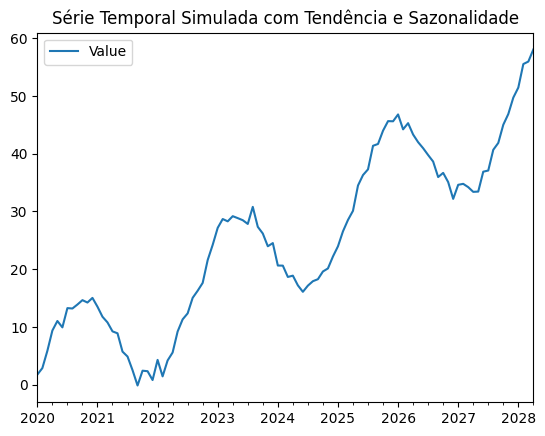

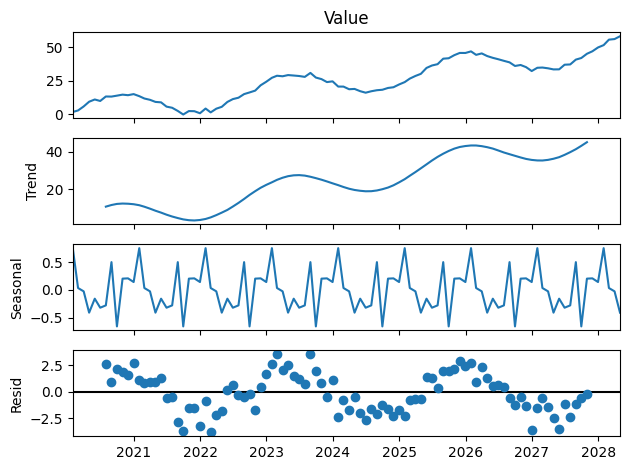

p-valor do teste ADF: 0.9663948551254142


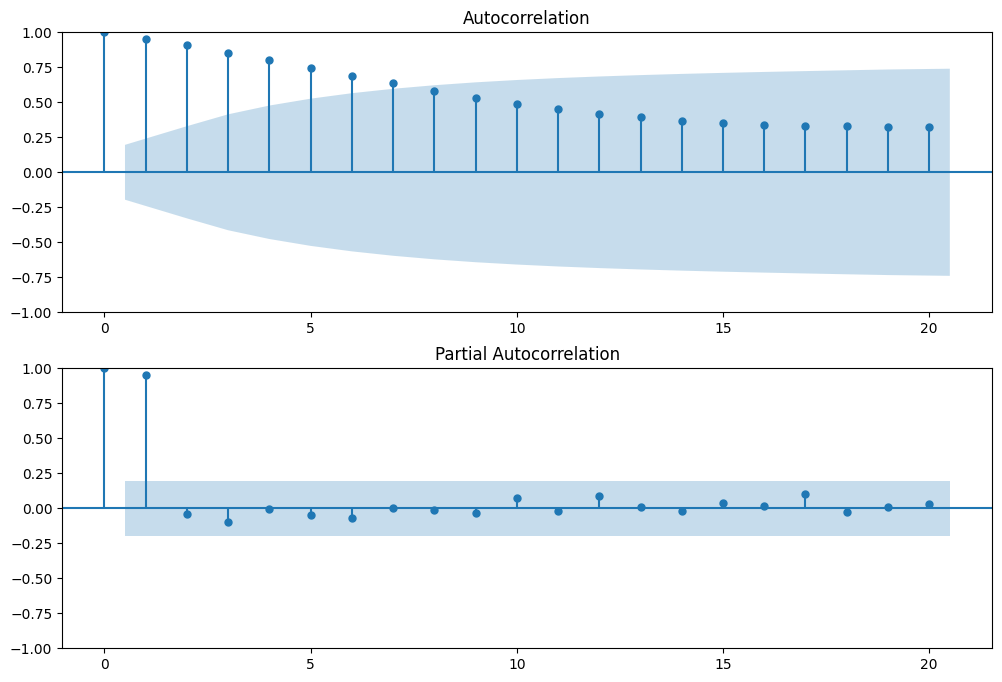

                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -196.148
Date:                Tue, 07 Nov 2023   AIC                            398.295
Time:                        23:44:36   BIC                            406.081
Sample:                    01-31-2020   HQIC                           401.445
                         - 04-30-2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9019      0.082     11.050      0.000       0.742       1.062
ma.L1         -0.6317      0.156     -4.056      0.000      -0.937      -0.326
sigma2         3.0637      0.473      6.471      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


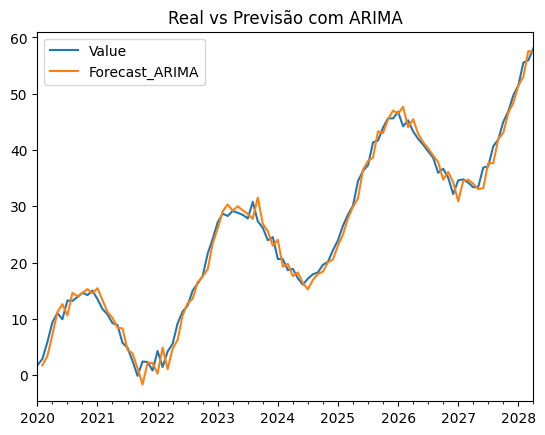

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Gerando dados simulados com tendência, sazonalidade e ruído
np.random.seed(0)
t = np.arange(100)
data = 0.5 * t + 10 * np.sin(0.2 * t) + np.random.normal(size=t.size)

# Transforma os dados em um DataFrame do pandas
ts = pd.DataFrame(data, columns=['Value'], index=pd.date_range(start='2020-01-01', periods=t.size, freq='M'))

# Plotando a série temporal
ts.plot(title='Série Temporal Simulada com Tendência e Sazonalidade')
plt.show()

# Decomposição em tendência, sazonalidade e ruído
result = seasonal_decompose(ts['Value'], model='additive')
result.plot()
plt.show()

# Teste de estacionariedade (Dickey-Fuller aumentado)
adf_test = adfuller(ts['Value'])
print('p-valor do teste ADF:', adf_test[1])

# Autocorrelação e Autocorrelação Parcial
lags = 20
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(ts['Value'], lags=lags, ax=ax1)
plot_pacf(ts['Value'], lags=lags, ax=ax2)
plt.show()

# Ajustando um modelo ARIMA
model = ARIMA(ts['Value'], order=(1, 1, 1))
model_fit = model.fit()

# Sumário do modelo ARIMA
print(model_fit.summary())

# Previsões com o modelo ARIMA
ts['Forecast_ARIMA'] = model_fit.predict(start=1, end=len(ts), typ='levels')
ts[['Value', 'Forecast_ARIMA']].plot(title='Real vs Previsão com ARIMA')
plt.show()


# 3. Explicando os termos

Cada bloco de código acima aborda os seguintes conceitos:

* **Tendência e Sazonalidade:** A série temporal simulada possui ambos os componentes.
* **Decomposição:** Usamos seasonal_decompose para visualizar a tendência, a sazonalidade e o ruído.
* **Estacionariedade:** O teste ADF verifica se a série temporal é estacionária.
* **Autocorrelação e Autocorrelação Parcial:** plot_acf e plot_pacf são usados para visualizar essas medidas.
* Modelos ARIMA: Um modelo ARIMA é ajustado aos dados para capturar a autocorrelação na série.

O método `seasonal_decompose` da biblioteca `statsmodels` realiza uma decomposição clássica de séries temporais em seus componentes principais: tendência, sazonalidade e ruído. Quando você chama `result.plot()`, ele gera um conjunto de quatro gráficos que são exibidos em uma única figura. Vamos discutir cada um desses gráficos:

1. **Observado (Observed)**: Este é o gráfico da série temporal original. Ele mostra os dados reais que você está analisando. No nosso exemplo simulado, você verá a combinação da tendência, sazonalidade e ruído conforme eles aparecem nos dados originais.

2. **Tendência (Trend)**: Este gráfico mostra o componente de tendência dos dados, que representa a direção de longo prazo na qual os dados estão se movendo. A tendência é obtida aplicando uma média móvel para suavizar as flutuações de curto prazo e destacar os movimentos de longo prazo. No exemplo, você veria a parte linear que aumenta devido à forma como os dados foram simulados (0.5 * t).

3. **Sazonal (Seasonal)**: Este gráfico exibe o componente sazonal, que mostra as flutuações regulares e previsíveis de curto prazo que ocorrem em um período fixo, como diariamente, mensalmente ou anualmente. No nosso exemplo, a função seno que foi adicionada aos dados simula a sazonalidade, então você veria um padrão repetitivo que corresponde a essa função.

4. **Resíduo (Resid)**: O último gráfico mostra o que sobra, ou os resíduos, depois que a tendência e a sazonalidade são removidos dos dados originais. Idealmente, este componente deveria ser apenas ruído aleatório; se houver estrutura restante nos resíduos, isso sugere que o modelo de decomposição pode não ter capturado toda a sazonalidade ou tendência nos dados, ou que há outros padrões nos dados que o modelo não capturou.

A decomposição aditiva é apropriada quando as flutuações sazonais são mais ou menos constantes ao longo do tempo. Se as flutuações sazonais aumentam com o nível da série temporal, uma decomposição multiplicativa pode ser mais apropriada.

Cada um desses gráficos é fundamental para entender como diferentes componentes contribuem para a formação dos dados da série temporal e para a construção de modelos preditivos.

O **componente de resíduo** em uma **decomposição de série temporal** é calculado removendo os efeitos estimados da tendência e da sazonalidade dos dados originais.

Em outras palavras, é o que sobra depois de "explicarmos" as partes da série temporal que podemos atribuir a padrões sistemáticos e previsíveis.

Para uma decomposição aditiva, o processo é geralmente o seguinte:

* **Estimar a Tendência:** Uma média móvel é frequentemente usada para estimar o componente de tendência. A janela da média móvel pode ser escolhida com base na frequência dos dados (por exemplo, uma média móvel de 12 meses para dados mensais com suspeita de sazonalidade anual).

* **Remover a Tendência dos Dados Originais:** Subtrair a tendência estimada dos dados originais para obter a série destendenciada.

* Estimar a Sazonalidade: Com a série destendenciada, a sazonalidade pode ser estimada encontrando a média para cada "temporada" ou período (por exemplo, a média de todos os janeiros, fevereiros, marços, etc., se os dados forem mensais).

* Remover a Sazonalidade: Subtrair o componente sazonal da série original destendenciada para isolar o ruído (ou os resíduos).

O resíduo é, portanto, calculado como:

***Residuo = Dados Originais − Tendencia Estimada − Sazonalidade Estimada***


O **teste de estacionaridade** é fundamental em análise de séries temporais porque a maioria dos modelos de previsão, como ARIMA (AutoRegressive Integrated Moving Average), assume que a série temporal é estacionária. Uma série temporal é considerada estacionária se as suas propriedades estatísticas, como média, variância e autocorrelação, são constantes ao longo do tempo.

O Teste Dickey-Fuller Aumentado (ADF) é um dos métodos mais comuns usados para testar a estacionaridade. Ele tem a hipótese nula de que uma série temporal possui uma raiz unitária, o que indica um processo não estacionário. A hipótese alternativa é que a série temporal é estacionária.

### Interpretação do Teste ADF:
- **Hipótese Nula (H0)**: A série temporal não é estacionária (possui uma raiz unitária).
- **Hipótese Alternativa (H1)**: A série temporal é estacionária (não possui uma raiz unitária).

Quando você executa o teste ADF, ele retorna vários valores, sendo um deles o p-valor. O p-valor indica a probabilidade de encontrar os dados observados se a hipótese nula for verdadeira. Portanto, um p-valor baixo (geralmente abaixo de 0.05) indica que você pode rejeitar a hipótese nula e considerar a série temporal como estacionária.

Aqui está como você pode interpretar o p-valor do teste ADF:

- **p-valor > 0.05**: Falhamos em rejeitar a hipótese nula, o que sugere que a série temporal não é estacionária e pode ter alguma estrutura temporal dependente.
- **p-valor ≤ 0.05**: Rejeitamos a hipótese nula, o que sugere que a série temporal é estacionária.

Aqui está o código em questão:

```python
# Teste de estacionariedade (Dickey-Fuller aumentado)
adf_test = adfuller(ts['Value'])
print('p-valor do teste ADF:', adf_test[1])
```

Esse código realiza o Teste Dickey-Fuller Aumentado na coluna 'Value' do DataFrame `ts` e imprime o p-valor. Se o p-valor for menor ou igual a 0.05, isso indica que há fortes evidências contra a hipótese nula, sugerindo que a série temporal não tem raiz unitária e é estacionária. Se for maior que 0.05, as evidências não são fortes o suficiente para rejeitar a hipótese nula e, portanto, a série pode ser não estacionária, indicando que talvez seja necessário diferenciá-la ou transformá-la para atingir a estacionariedade antes de tentar ajustar um modelo de previsão.

### Autocorrelação (ACF – Autocorrelation Function)
A autocorrelação mede a relação linear entre os valores de uma série temporal em diferentes tempos. Para um lag específico \( k \), é o coeficiente de correlação entre os valores da série temporal e os valores separados por \( k \) intervalos de tempo.

- **Lag**: Em séries temporais, o "lag" é o intervalo de tempo pelo qual as observações são deslocadas. Um lag de 1 significa que cada valor na série é comparado com o valor imediatamente anterior.

- **Interpretação do Gráfico ACF**: No gráfico de autocorrelação, você verá o lag no eixo horizontal e o coeficiente de autocorrelação no eixo vertical. Valores que estão fora da área de confiança (geralmente marcada por linhas pontilhadas acima e abaixo de zero) sugerem uma autocorrelação significativa. Se você observar um decaimento lento e gradual, isso pode indicar um processo não estacionário.

### Autocorrelação Parcial (PACF – Partial Autocorrelation Function)
A autocorrelação parcial mede a correlação entre a série temporal e seus lags, controlando os efeitos de lags intermediários. Isso nos diz o quanto cada lag individual contribui para a previsão do valor atual quando os efeitos dos lags anteriores já foram contabilizados.

#### Ordem de um Modelo Autoregressivo
- Em um modelo autoregressivo (AR), a variável de interesse é prevista com base em uma combinação de seus valores anteriores. A "ordem" de um modelo AR é o número de lags passados que são utilizados como preditores. Por exemplo, um modelo AR(1) usa o valor imediatamente anterior (lag 1) na previsão, um modelo AR(2) usa os dois valores anteriores (lags 1 e 2), e assim por diante.
- **Interpretação do Gráfico PACF**: Barras que se estendem além da área de confiança indicam lags que são preditores significativos, após contabilizar os lags intermediários. A ordem de um modelo AR é frequentemente escolhida com base em quão distante o PACF é significativo antes de cortar (ou seja, onde o PACF torna-se insignificante).

### Autocovariância
Autocovariância é a medida da variação conjunta de uma série temporal com sua versão atrasada. Ao contrário da autocorrelação, que é dimensionless, a autocovariância está em unidades ao quadrado da série temporal. É a base sobre a qual a autocorrelação é normalizada.

### Importância em Séries Temporais
- **Identificação de Modelos**: ACF e PACF ajudam a identificar os termos apropriados para modelos autoregressivos e médias móveis.
- **Diagnóstico de Dependência Temporal**: Compreender como os valores passados afetam os futuros é crucial na previsão de séries temporais.
- **Avaliação de Modelos**: Após ajustar um modelo, podemos usar ACF e PACF para verificar se restam padrões não capturados.
- **Detectar Sazonalidade**: Ambos podem indicar padrões sazonais que precisam ser modelados.

### Conclusão
O uso inteligente da ACF e PACF permite aos analistas e estatísticos construir modelos autoregressivos de ordem adequada, garantindo que toda a informação útil dos lags seja utilizada e a redundância seja evitada. Isso é fundamental para criar modelos de previsão precisos e confiáveis.

**Modelos autoregressivos (AR) e modelos baseados em médias móveis (MA)** são dois componentes fundamentais na modelagem de séries temporais, e muitas vezes são combinados no que é conhecido como modelo **ARIMA (AutoRegressive Integrated Moving Average)**. Vamos explorar as diferenças entre eles:

### Modelos Autoregressivos (AR)

1. **Definição**: Um modelo autoregressivo utiliza a dependência entre uma observação e um número de observações passadas. É uma regressão da variável contra si mesma em lags anteriores.

2. **Ordem**: A ordem de um modelo AR é o número de lags passados utilizados para prever o valor atual. Um modelo AR(p) usa os p lags anteriores como preditores.

3. **Equação**: A forma geral de um modelo AR(p) pode ser escrita como:
   \( Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + \varepsilon_t \)
   onde \( Y_t \) é o valor atual, \( c \) é uma constante, \( \phi \) são os parâmetros do modelo e \( \varepsilon_t \) é o erro branco (ruído).

4. **Autocorrelação**: Em um modelo AR, espera-se que a função de autocorrelação (ACF) decaia exponencialmente ou de forma senoidal e a função de autocorrelação parcial (PACF) tenha picos significativos nos primeiros 'p' lags e então corte.

### Modelos de Médias Móveis (MA)

1. **Definição**: Um modelo de médias móveis modela a série temporal com base em erros passados (choques ou inovações de ruído branco). Ele captura a dependência entre uma observação e um erro de previsão passado.

2. **Ordem**: A ordem de um modelo MA é o número de erros passados incluídos no modelo. Um modelo MA(q) usa os q erros passados na modelagem.

3. **Equação**: A forma geral de um modelo MA(q) é:
   \( Y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + ... + \theta_q \varepsilon_{t-q} \)
   onde \( \mu \) é a média da série, \( \varepsilon_t \) é o erro do modelo no tempo t, e \( \theta \) são os parâmetros do modelo.

4. **Autocorrelação**: Em um modelo MA, a ACF terá picos significativos nos primeiros 'q' lags e então corte, enquanto a PACF decairá mais gradualmente.

### Diferenças Chave

- **Resposta a Choques**: Em modelos AR, um choque afeta os valores da série temporal por um período prolongado, com o efeito diminuindo gradualmente. Em modelos MA, um choque afeta a série temporal apenas por um número limitado de períodos (igual à ordem do MA).

- **Estimação de Parâmetros**: Os modelos AR podem ser mais desafiadores para estimar quando a ordem é grande, pois a regressão pode envolver muitos termos. Modelos MA podem ser mais simples de estimar, mas a interpretação dos parâmetros pode ser menos intuitiva.

- **Uso**: Modelos AR são preferíveis quando a série temporal mostra uma autocorrelação significativa que se estende por vários lags. Modelos MA são úteis quando a autocorrelação da série temporal é significativa apenas em lags recentes.

- **Complexidade**: Modelos AR tendem a ser mais complexos devido ao número de lags que podem ser incluídos, enquanto os modelos MA têm uma estrutura de dependência mais curta.


**Modelo Autoregressivo (AR)**
$$
\begin{aligned}
Y_t &= c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \ldots + \phi_p Y_{t-p} + \varepsilon_t \\
\text{onde} & \\
Y_t & \text{: valor atual da série temporal} \\
c & \text{: constante} \\
\phi_i & \text{: parâmetro do modelo no lag } i \\
\varepsilon_t & \text{: termo de erro (ruído branco) no tempo } t
\end{aligned}
$$

**Modelo de Médias Móveis (MA)**
$$
\begin{aligned}
Y_t &= \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q} \\
\text{onde} & \\
Y_t & \text{: valor atual da série temporal} \\
\mu & \text{: média da série temporal} \\
\varepsilon_t & \text{: termo de erro no tempo } t \\
\theta_i & \text{: parâmetro do modelo associado ao erro no lag } i
\end{aligned}
$$


### Conclusão

AR e MA são abordagens distintas para modelar séries temporais, cada uma com suas próprias forças e fraquezas. Em muitos casos práticos, esses modelos são combinados para aproveitar as vantagens de ambos, levando ao modelo ARIMA que pode lidar com diferentes padrões de autocorrelação na série temporal.

Dentro da análise de séries temporais, modelos sazonais são utilizados para descrever e modelar padrões que se repetem em intervalos regulares ao longo do tempo. Um modelo de regressão harmônica é uma forma de capturar a sazonalidade em séries temporais, utilizando funções seno e cosseno para modelar periodicidades.

### Modelo de Regressão Harmônica

A ideia fundamental por trás do **modelo de regressão harmônica** é que qualquer movimento sazonal periódico pode ser aproximado por uma série de componentes senoidais (seno e cosseno) com diferentes frequências. Este é um princípio derivado da **análise de Fourier**, que afirma que qualquer função periódica pode ser escrita como a soma de funções senoidais.

A equação geral para um modelo de regressão harmônica é:

$$
Y_t = c + \sum_{n=1}^{N} \left[ a_n \cos\left( \frac{2\pi n t}{T} \right) + b_n \sin\left( \frac{2\pi n t}{T} \right) \right] + \varepsilon_t
$$

Onde:
- \( Y_t \) é o valor da série temporal no tempo \( t \).
- \( c \) é uma constante (intercepto).
- \( a_n \) e \( b_n \) são os coeficientes para o \( n \)-ésimo termo harmônico.
- \( N \) é o número de termos harmônicos usados na regressão.
- \( T \) é o período da sazonalidade.
- \( \frac{2\pi n}{T} \) é a frequência angular do \( n \)-ésimo harmônico.
- \( \varepsilon_t \) é o termo de erro aleatório no tempo \( t \).

Cada par de seno e cosseno corresponde a um componente harmônico que captura uma parte do padrão sazonal. A seleção do número \( N \) de termos harmônicos a incluir no modelo depende da complexidade da sazonalidade e do ajuste desejado. Geralmente, mais termos permitem modelar padrões sazonais mais complexos, mas também aumentam o risco de sobreajustar o modelo aos dados.

Ao usar a regressão harmônica, é importante realizar análises como diagnósticos de resíduos para garantir que o modelo harmônico seja adequado e que não haja autocorrelação nos resíduos, o que poderia indicar a falta de algum componente sazonal importante no modelo.

### Modelo ARIMA

O modelo ARIMA (Autoregressive Integrated Moving Average) é uma classe geral de modelos para prever uma série temporal que pode ser não estacionária. ARIMA é um acrônimo que descreve a natureza do modelo:

- **AR (Autoregressive)**: O modelo usa a relação dependente entre uma observação e um número de observações defasadas.
- **I (Integrated)**: Utiliza o diferenciamento das observações brutas (por exemplo, subtraindo a observação do período anterior) para tornar a série temporal estacionária.
- **MA (Moving Average)**: O modelo explora a relação entre a observação e um erro residual de um modelo de médias móveis aplicado a observações defasadas.

A equação de um modelo ARIMA(p, d, q) é:

$$
(1 - \sum_{i=1}^{p} \phi_i L^i)(1 - L)^d Y_t = c + (1 + \sum_{j=1}^{q} \theta_j L^j) \varepsilon_t
$$

Onde:
- \( Y_t \) é o valor da série temporal no tempo \( t \).
- \( L \) é o operador de defasagem (lag operator).
- \( \phi_i \) são os coeficientes do modelo autoregressivo.
- \( \theta_j \) são os coeficientes do modelo de médias móveis.
- \( c \) é uma constante.
- \( \varepsilon_t \) é o termo de erro.
- \( d \) é a ordem de diferenciação necessária para tornar a série temporal estacionária.

O modelo ARIMA é adequado para séries temporais estacionárias após a diferenciação, isto é, para séries que se tornam estacionárias após aplicar \( d \) diferenças.

### Modelo SARIMAX

O modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous variables) é uma extensão do ARIMA que suporta explicitamente sazonalidade e variáveis exógenas (externas). Ele inclui termos sazonais ARIMA e também permite a modelagem do efeito de variáveis independentes que influenciam a série temporal.

A equação de um modelo SARIMAX(p, d, q)(P, D, Q)s é:

$$
(1 - \sum_{i=1}^{p} \phi_i L^i)(1 - \sum_{i=1}^{P} \Phi_i L^{is})(1 - L)^d(1 - L^s)^D Y_t = c + (1 + \sum_{j=1}^{q} \theta_j L^j)(1 + \sum_{j=1}^{Q} \Theta_j L^{js}) \varepsilon_t + \sum_{k} \beta_k x_{kt}
$$

Onde:
- \( Y_t \) é o valor da série temporal no tempo \( t \).
- \( x_{kt} \) são as variáveis exógenas.
- \( \beta_k \) são os coeficientes das variáveis exógenas.
- Os outros símbolos seguem a mesma definição do ARIMA, com a adição de:
  - \( P, D, Q \) são os equivalentes sazonais de \( p, d, q \).
  - \( s \) é a periodicidade da sazonalidade.
  - \( \Phi \) e \( \Theta \) são os coeficientes dos termos autoregressivos e de médias móveis sazonais, respectivamente.

O modelo SARIMAX é mais complexo devido à inclusão da sazonalidade e das variáveis exógenas. Ele é adequado para séries temporais não estacionárias com padrões sazonais e quando há variáveis externas relevantes para a previsão.

Em resumo, o ARIMA é mais indicado para séries temporais que são estacionárias após diferenciação e não apresentam sazonalidade. Já o SARIMAX é mais apropriado para séries temporais não estacionárias que têm uma componente sazonal clara e podem ser influenciadas por variáveis exógenas.

### Diferenciação no ARIMA

A diferenciação é uma técnica usada em séries temporais para tornar a série estacionária, ou seja, para estabilizar a média da série ao longo do tempo. A estacionariedade é importante porque muitos modelos de previsão de séries temporais, incluindo o ARIMA, assumem que as estatísticas básicas da série não mudam ao longo do tempo.

Uma série estacionária terá propriedades como média e variância constantes ao longo do tempo, o que é crucial para a previsibilidade. Em muitos casos, as séries temporais exibem tendências ou sazonalidade que as tornam não estacionárias. Por exemplo, o PIB de um país pode ter uma tendência de crescimento, ou as vendas de uma loja podem ter picos durante períodos de festas.

**Exemplo de Não Estacionariedade:**

Imagine uma série temporal do PIB de um país que cresce 2% a cada ano. Se você tentar ajustar um modelo ARIMA sem diferenciar, o modelo terá dificuldade em capturar essa tendência crescente porque está tentando modelar dados com uma média crescente.

**Aplicação da Diferenciação:**

Para tornar essa série estacionária, você pode aplicar a diferenciação, que é simplesmente subtrair o valor atual da série pelo valor anterior (\(Y_t - Y_{t-1}\)). Ao fazer isso, você está removendo a tendência da série, permitindo que o modelo capture melhor as dinâmicas que são constantes ao longo do tempo, como flutuações ou ciclos econômicos regulares em torno da tendência de crescimento.

Se houver sazonalidade, a diferenciação sazonal também pode ser aplicada. Por exemplo, se o PIB tem uma forte componente sazonal onde cresce significativamente a cada quarto trimestre, você pode diferenciar a série pegando a diferença de um ano atrás (\(Y_t - Y_{t-4}\) para dados trimestrais).

### Variáveis Exógenas no SARIMAX

Variáveis exógenas são aquelas que influenciam a série temporal de interesse, mas que são determinadas fora do modelo. Em outras palavras, são variáveis independentes que não são afetadas pelas previsões que o modelo está fazendo.

**Exemplo de Variáveis Exógenas:**

Imagine que você está modelando a demanda mensal de energia elétrica, que é influenciada por fatores como a temperatura média e os dias úteis no mês. Esses fatores podem ser considerados variáveis exógenas na modelagem da demanda de energia:

- **Temperatura Média:** Nos meses de verão, a demanda por energia pode ser maior devido ao uso de ar-condicionado. A temperatura não é determinada pela demanda de energia; ela é determinada por fatores climáticos externos.
- **Dias Úteis:** Mais dias úteis podem significar maior atividade industrial e comercial, levando a um aumento no consumo de energia. Os dias úteis são determinados pelo calendário e não pela demanda de energia.

Incluir essas variáveis exógenas no modelo SARIMAX permite que você capture o efeito dessas variáveis sobre a série temporal que está sendo prevista, potencialmente melhorando a precisão das previsões.

Em resumo, as diferenciações no ARIMA são essenciais para lidar com a não estacionariedade, tornando a série temporal adequada para a modelagem estatística. As variáveis exógenas no SARIMAX permitem a incorporação de informações adicionais que estão fora da série temporal mas que têm uma influência significativa sobre ela, enriquecendo o modelo e melhorando sua capacidade preditiva.

### Métodos não paramétricos

A **regressão de Nadaraya-Watson** é um tipo de regressão kernel, que faz parte dos métodos de suavização local. Em vez de supor uma forma funcional específica para a relação entre as variáveis independentes e dependentes, a regressão kernel usa os pontos de dados próximos ao ponto de interesse para estimar a função de regressão.

O **kernel de Epanechnikov** é uma função de peso que é comumente usada em métodos de suavização devido às suas boas propriedades. É definido de forma que dê mais peso aos pontos de dados próximos ao ponto de interesse e menos peso aos pontos mais distantes, com a particularidade de ter um suporte compacto, o que significa que apenas os pontos dentro de uma certa faixa da variável independente contribuem para a estimativa da função em um ponto específico.

Para usar este método em séries temporais para previsão, você geralmente aplicaria a regressão de Nadaraya-Watson para ajustar um modelo aos dados históricos e, em seguida, usaria o modelo para fazer previsões sobre o futuro. No entanto, é importante ter em mente que métodos não paramétricos como a regressão de Nadaraya-Watson podem requerer uma grande quantidade de dados para fornecer estimativas precisas e podem ser computacionalmente intensivos.

Além disso, embora os métodos de regressão kernel possam ser bastante flexíveis e poderosos para capturar padrões não lineares e complexos, eles não incorporam diretamente a dependência temporal que é intrínseca às séries temporais, como fazem os modelos ARIMA ou modelos baseados em espaço de estados. Portanto, quando aplicados a séries temporais, esses métodos podem precisar ser combinados com outras técnicas que levem em conta a autocorrelação e a sazonalidade dos dados.

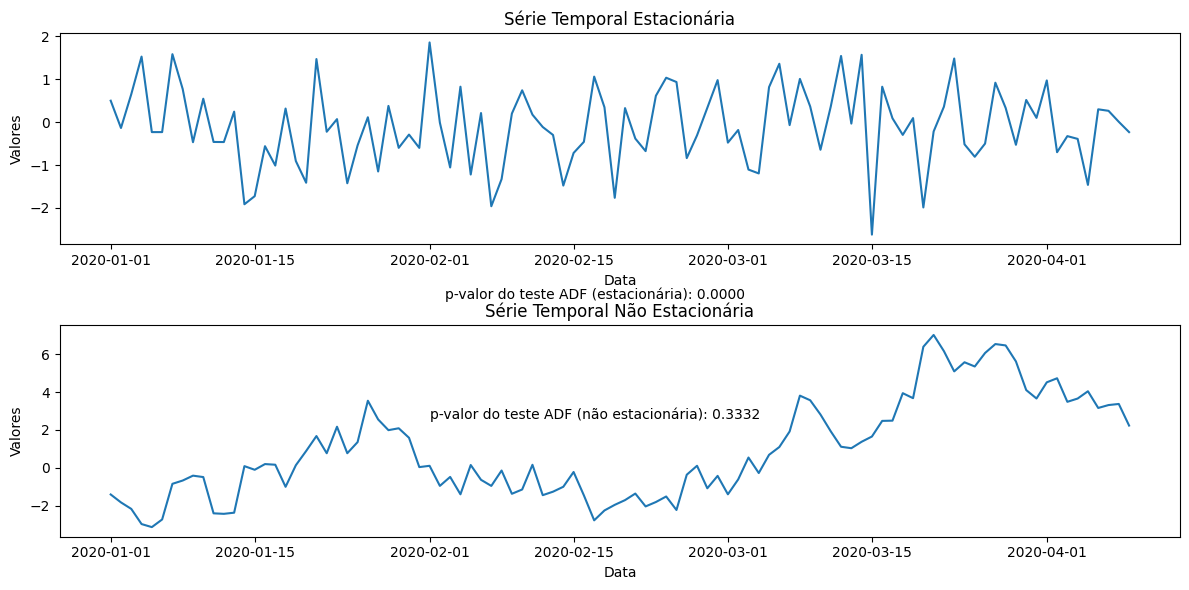

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# Configurando o seed para reprodutibilidade
np.random.seed(42)

# Gerando uma série temporal estacionária com ruído branco
stationary_series = np.random.normal(loc=0, scale=1, size=100)

# Gerando uma série temporal não estacionária com uma tendência
non_stationary_series = np.random.normal(loc=0, scale=1, size=100).cumsum()

# Convertendo para pandas Series e criando um índice de tempo
time_index = pd.date_range(start='2020-01-01', periods=100, freq='D')
stationary_series = pd.Series(stationary_series, index=time_index)
non_stationary_series = pd.Series(non_stationary_series, index=time_index)

# Plotando a série estacionária
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(stationary_series)
plt.title('Série Temporal Estacionária')
plt.xlabel('Data')
plt.ylabel('Valores')

# Realizando e imprimindo o resultado do teste ADF para a série estacionária
adf_test_stationary = adfuller(stationary_series)
plt.figtext(0.5, 0.5, f'p-valor do teste ADF (estacionária): {adf_test_stationary[1]:.4f}', ha='center', va='center', fontsize=10)

# Plotando a série não estacionária
plt.subplot(2, 1, 2)
plt.plot(non_stationary_series)
plt.title('Série Temporal Não Estacionária')
plt.xlabel('Data')
plt.ylabel('Valores')

# Realizando e imprimindo o resultado do teste ADF para a série não estacionária
adf_test_non_stationary = adfuller(non_stationary_series)
plt.figtext(0.5, 0.3, f'p-valor do teste ADF (não estacionária): {adf_test_non_stationary[1]:.4f}', ha='center', va='center', fontsize=10)

# Mostrando os gráficos
plt.tight_layout()
plt.show()


In [ ]:
pip install numpy pandas matplotlib statsmodels pmdarima

p-valor: 3.383280635477707e-12
A série é estacionária.


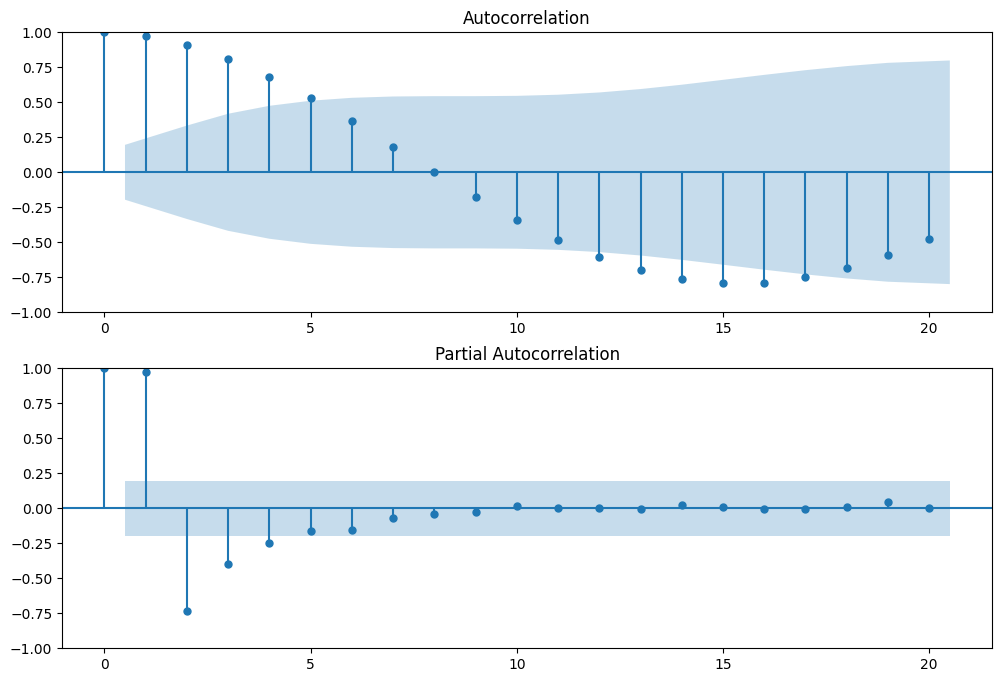

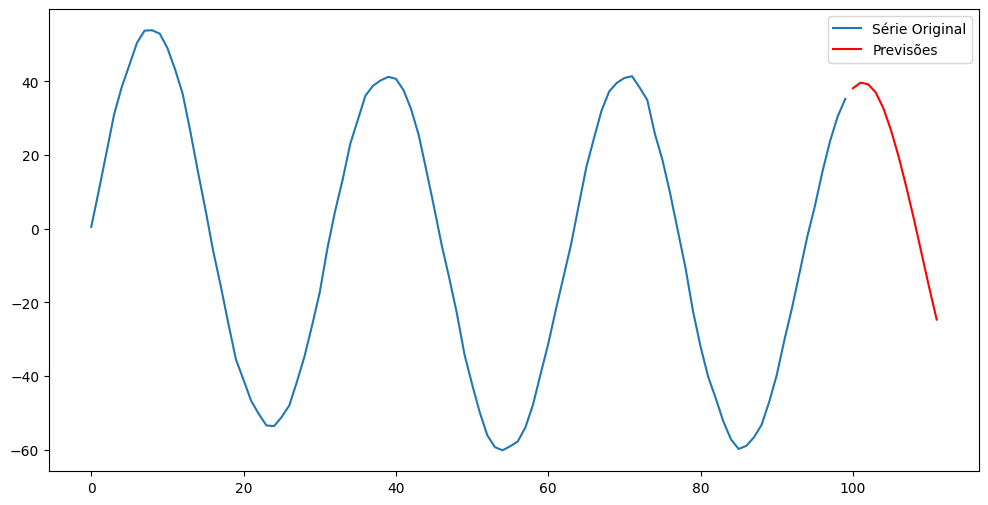

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Gerando uma série temporal estacionária com autocorrelação
np.random.seed(42)
random_data = np.random.normal(loc=0, scale=1, size=100)
stationary_series = pd.Series(random_data).cumsum() + 50 * np.sin(np.linspace(0, 20, 100))

# Testando a estacionariedade
adf_test = adfuller(stationary_series)
print(f'p-valor: {adf_test[1]}')
if adf_test[1] < 0.05:
    print('A série é estacionária.')
else:
    print('A série não é estacionária.')

# Análise de ACF e PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(stationary_series, lags=20, ax=ax1)
plot_pacf(stationary_series, lags=20, ax=ax2)
plt.show()

# Ajustando um modelo AR
lags = 10  # assumindo que após análise de ACF e PACF você decida que 10 é um bom número de lags
model = AutoReg(stationary_series, lags=lags)
model_fit = model.fit()

# Fazendo previsões
forecast_steps = 12
predictions = model_fit.predict(start=len(stationary_series), end=len(stationary_series) + forecast_steps - 1)

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(stationary_series, label='Série Original')
plt.plot(np.arange(len(stationary_series), len(stationary_series) + forecast_steps), predictions, label='Previsões', color='red')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=369.775, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=710.310, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=408.547, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=587.070, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=298.548, Time=0.29 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=329.872, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=299.682, Time=0.36 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=299.305, Time=0.66 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=351.715, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=313.411, Time=0.10 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=301.001, Time=0.64 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=296.518, Time=0.38 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=371.747, Time=0.19 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=331.812, Time=0.15 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=297.6

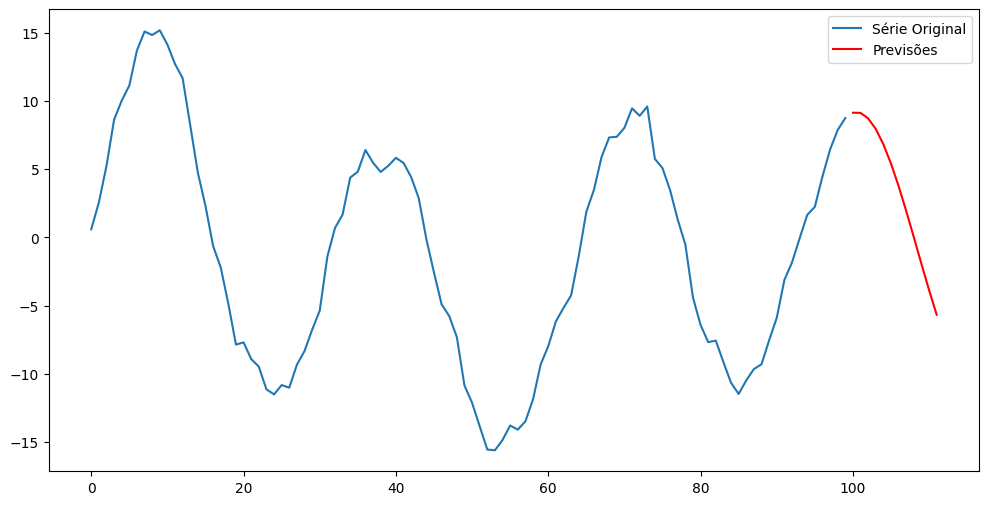

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Gerando uma série temporal não estacionária com tendência e sazonalidade
np.random.seed(42)
random_walk = np.random.normal(loc=0.1, scale=1, size=100).cumsum()
non_stationary_series = pd.Series(random_walk + 10 * np.sin(np.linspace(0, 20, 100)))

# Ajustando um modelo ARIMA com auto_arima
model = auto_arima(non_stationary_series, start_p=1, start_q=1,
                   test='adf',       # use adftest para encontrar ordem de diferenciação ideal
                   max_p=3, max_q=3, # máximos lags de AR e MA
                   m=1,              # frequência da série temporal (deixe em 1 se não for sazonal)
                   d=None,           # deixe d como None para auto-determinar
                   seasonal=False,   # ajuste para True se houver sazonalidade
                   start_P=0,
                   D=0,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

print(model.summary())

# Fazendo previsões
forecast_steps = 12
predictions = model.predict(n_periods=forecast_steps)

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(non_stationary_series, label='Série Original')
plt.plot(np.arange(len(non_stationary_series), len(non_stationary_series) + forecast_steps), predictions, label='Previsões', color='red')
plt.legend()
plt.show()


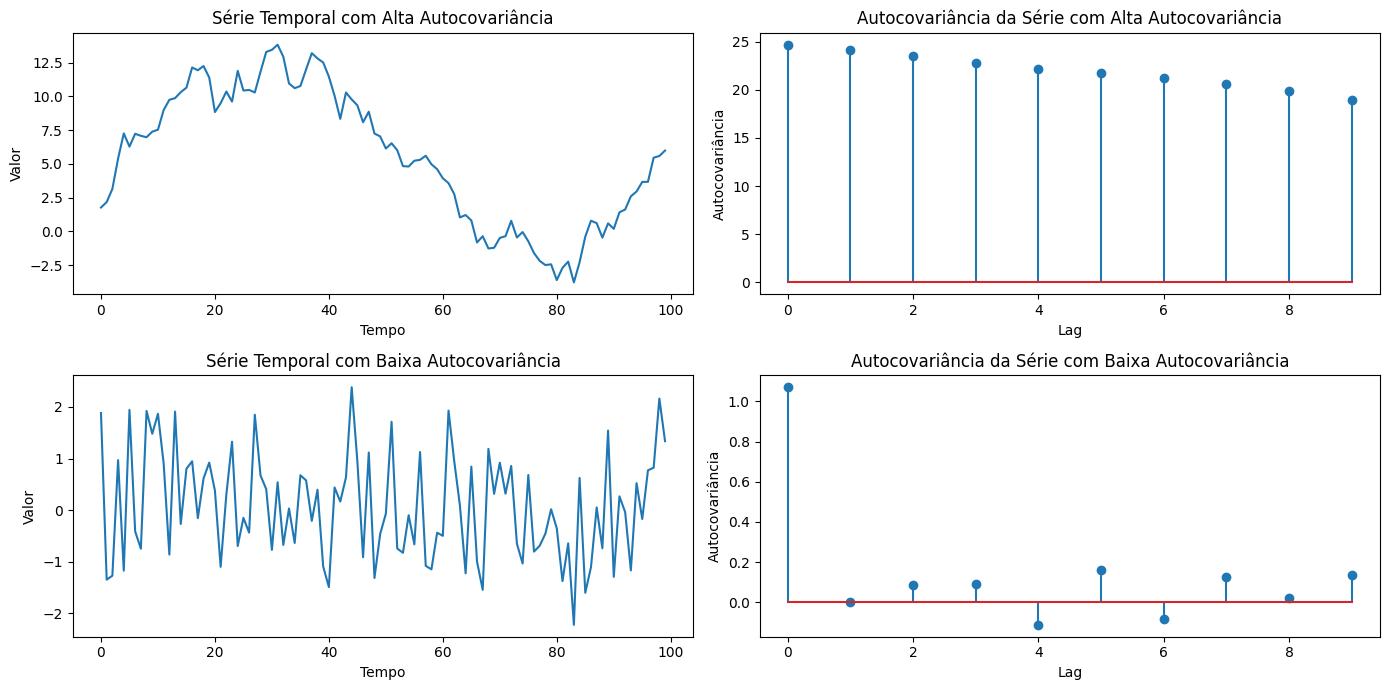

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o número de pontos da série temporal
n_points = 100

# Gerando uma série temporal com alta autocovariância (ex: série temporal autocorrelacionada)
np.random.seed(0)
high_acov_series = np.cumsum(np.random.randn(n_points))

# Gerando uma série temporal com baixa autocovariância (ex: ruído branco)
low_acov_series = np.random.randn(n_points)

# Função para calcular a autocovariância para um lag específico
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    return np.sum((series[:n-lag] - mean) * (series[lag:] - mean)) / n

# Calculando a autocovariância para diferentes lags
lags = range(10)
high_acov_values = [autocovariance(high_acov_series, lag) for lag in lags]
low_acov_values = [autocovariance(low_acov_series, lag) for lag in lags]

# Plotando as séries temporais e seus valores de autocovariância
fig, axes = plt.subplots(2, 2, figsize=(14, 7))

# Plotando a série temporal com alta autocovariância
axes[0, 0].plot(high_acov_series)
axes[0, 0].set_title('Série Temporal com Alta Autocovariância')
axes[0, 0].set_xlabel('Tempo')
axes[0, 0].set_ylabel('Valor')

# Plotando a autocovariância para a série com alta autocovariância
axes[0, 1].stem(lags, high_acov_values)
axes[0, 1].set_title('Autocovariância da Série com Alta Autocovariância')
axes[0, 1].set_xlabel('Lag')
axes[0, 1].set_ylabel('Autocovariância')

# Plotando a série temporal com baixa autocovariância
axes[1, 0].plot(low_acov_series)
axes[1, 0].set_title('Série Temporal com Baixa Autocovariância')
axes[1, 0].set_xlabel('Tempo')
axes[1, 0].set_ylabel('Valor')

# Plotando a autocovariância para a série com baixa autocovariância
axes[1, 1].stem(lags, low_acov_values)
axes[1, 1].set_title('Autocovariância da Série com Baixa Autocovariância')
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Autocovariância')

plt.tight_layout()
plt.show()


Epoch 1/100
523/523 - 4s - loss: 0.0039 - 4s/epoch - 7ms/step
Epoch 2/100
523/523 - 1s - loss: 0.0023 - 1s/epoch - 3ms/step
Epoch 3/100
523/523 - 1s - loss: 0.0018 - 1s/epoch - 2ms/step
Epoch 4/100
523/523 - 1s - loss: 0.0016 - 1s/epoch - 2ms/step
Epoch 5/100
523/523 - 1s - loss: 0.0015 - 1s/epoch - 2ms/step
Epoch 6/100
523/523 - 1s - loss: 0.0015 - 986ms/epoch - 2ms/step
Epoch 7/100
523/523 - 1s - loss: 0.0014 - 916ms/epoch - 2ms/step
Epoch 8/100
523/523 - 1s - loss: 0.0015 - 933ms/epoch - 2ms/step
Epoch 9/100
523/523 - 1s - loss: 0.0015 - 857ms/epoch - 2ms/step
Epoch 10/100
523/523 - 1s - loss: 0.0015 - 885ms/epoch - 2ms/step
Epoch 11/100
523/523 - 1s - loss: 0.0015 - 878ms/epoch - 2ms/step
Epoch 12/100
523/523 - 1s - loss: 0.0014 - 856ms/epoch - 2ms/step
Epoch 13/100
523/523 - 1s - loss: 0.0015 - 970ms/epoch - 2ms/step
Epoch 14/100
523/523 - 1s - loss: 0.0014 - 1s/epoch - 2ms/step
Epoch 15/100
523/523 - 1s - loss: 0.0014 - 1s/epoch - 2ms/step
Epoch 16/100
523/523 - 1s - loss: 0.0014

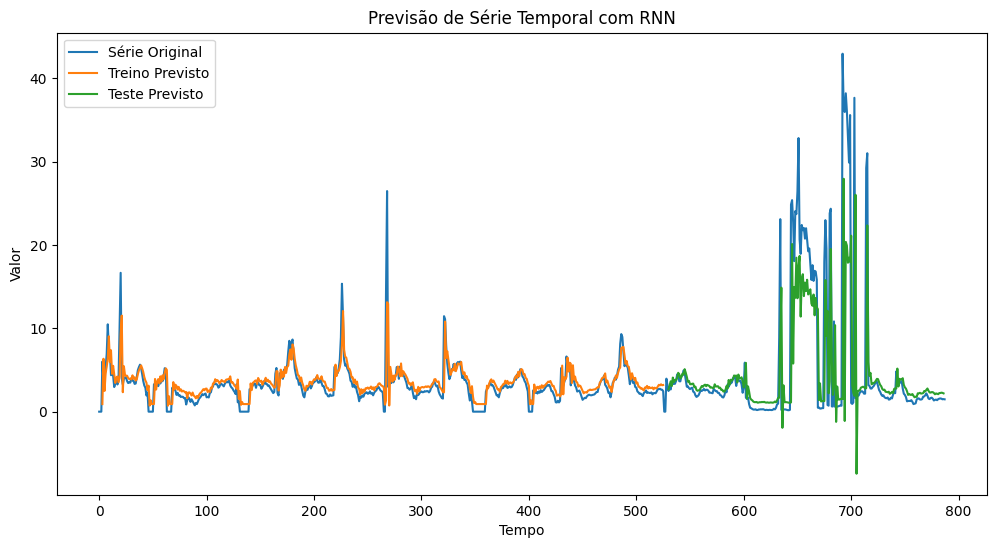

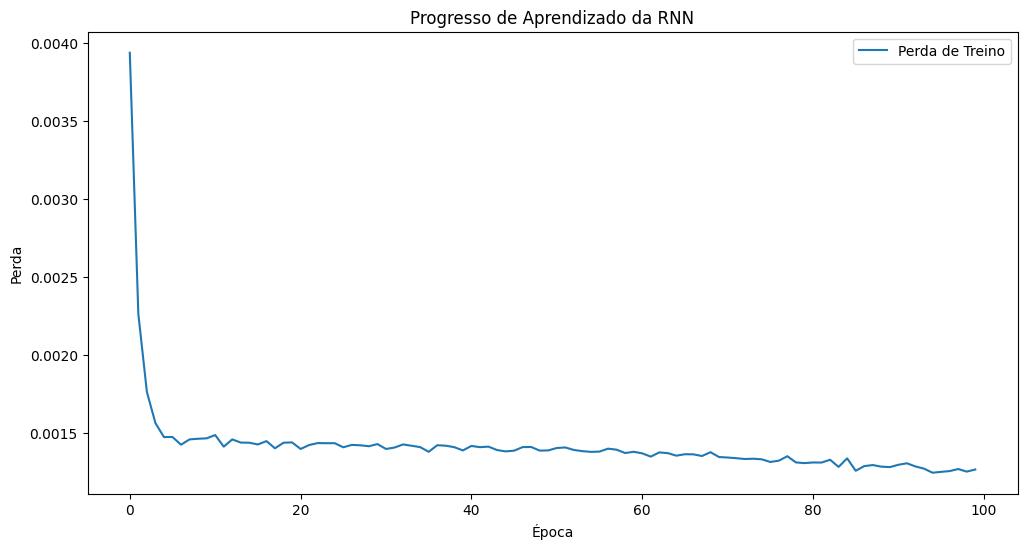

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Suponha que df é um DataFrame com sua série temporal
df = pd.read_csv('/content/ili_data.csv')

# Normalizando os dados para a escala [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1))

# Dividindo os dados em conjuntos de treino e teste
train_size = int(len(scaled_data) * 0.67)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Função para criar um dataset para a RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reformata os dados de entrada [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Construindo o modelo RNN
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo
history = model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Fazendo as previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertendo as previsões para a escala original
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

# Calculando o RMSE
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))
print('Test Score: %.2f RMSE' % (test_score))

# Plotando os resultados
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = test_predict

# Plotando a linha de base e as previsões
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Série Original')
plt.plot(train_predict_plot, label='Treino Previsto')
plt.plot(test_predict_plot, label='Teste Previsto')
plt.title('Previsão de Série Temporal com RNN')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Plotando a acurácia
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda de Treino')
plt.title('Progresso de Aprendizado da RNN')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()


Epoch 1/100
390/390 - 6s - loss: 0.0040 - val_loss: 0.0263 - 6s/epoch - 15ms/step
Epoch 2/100
390/390 - 2s - loss: 0.0031 - val_loss: 0.0226 - 2s/epoch - 6ms/step
Epoch 3/100
390/390 - 1s - loss: 0.0027 - val_loss: 0.0195 - 1s/epoch - 3ms/step
Epoch 4/100
390/390 - 1s - loss: 0.0024 - val_loss: 0.0182 - 1s/epoch - 3ms/step
Epoch 5/100
390/390 - 1s - loss: 0.0023 - val_loss: 0.0168 - 1s/epoch - 3ms/step
Epoch 6/100
390/390 - 1s - loss: 0.0021 - val_loss: 0.0162 - 1s/epoch - 3ms/step
Epoch 7/100
390/390 - 2s - loss: 0.0020 - val_loss: 0.0162 - 2s/epoch - 6ms/step
Epoch 8/100
390/390 - 1s - loss: 0.0020 - val_loss: 0.0155 - 1s/epoch - 3ms/step
Epoch 9/100
390/390 - 1s - loss: 0.0019 - val_loss: 0.0152 - 1s/epoch - 3ms/step
Epoch 10/100
390/390 - 1s - loss: 0.0019 - val_loss: 0.0153 - 1s/epoch - 3ms/step
Epoch 11/100
390/390 - 1s - loss: 0.0019 - val_loss: 0.0150 - 1s/epoch - 3ms/step
Epoch 12/100
390/390 - 1s - loss: 0.0019 - val_loss: 0.0154 - 1s/epoch - 3ms/step
Epoch 13/100
390/390 - 1

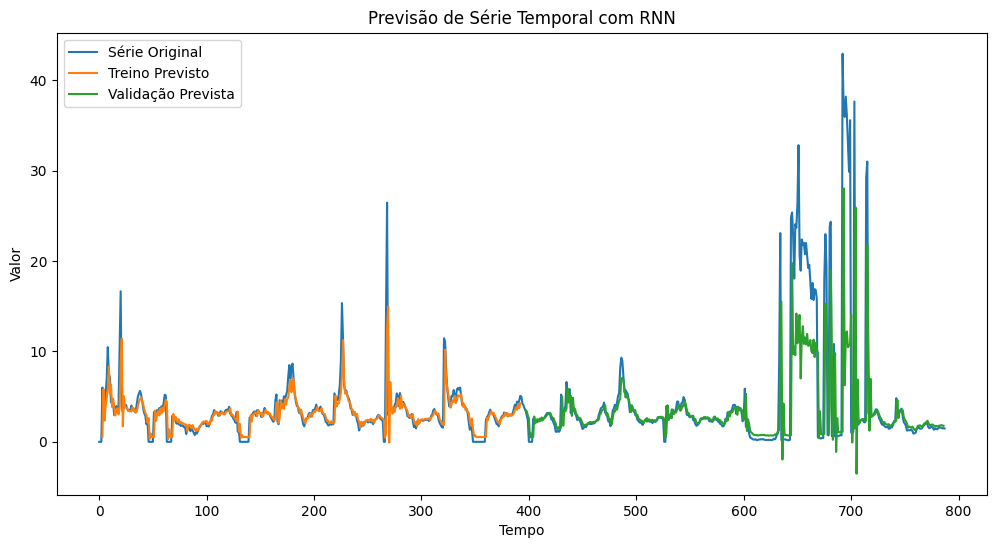

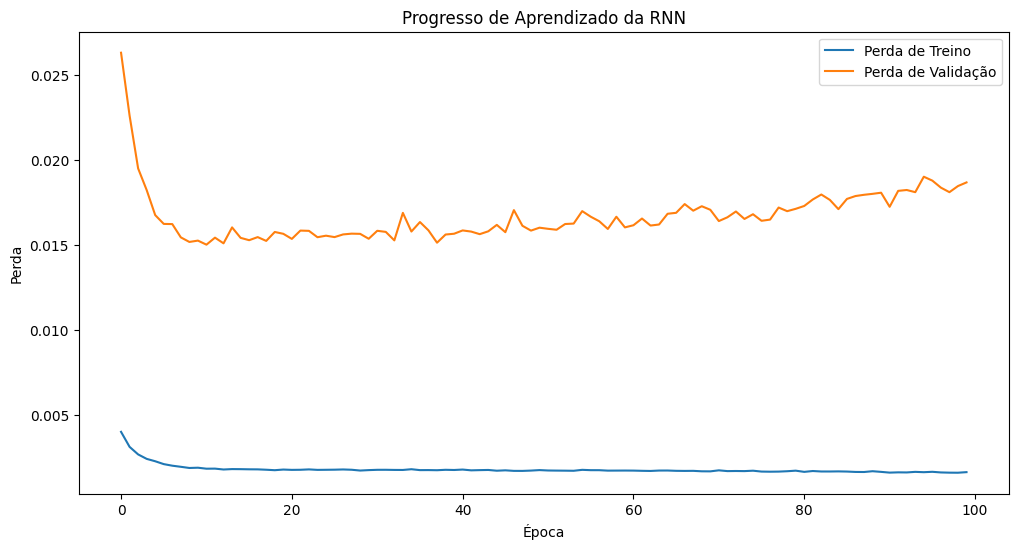

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Suponha que df é um DataFrame com sua série temporal
df = pd.read_csv('/content/ili_data.csv')

# Normalizando os dados para a escala [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1))

# Encontrando a mediana do índice do DataFrame
median_index = df.index[int(len(df) / 2)]

# Dividindo os dados em conjuntos de treino e validação com base na mediana
train = scaled_data[:median_index, :]
validation = scaled_data[median_index:, :]

# Função para criar um dataset para a RNN
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 3
X_train, Y_train = create_dataset(train, look_back)
X_validation, Y_validation = create_dataset(validation, look_back)

# Reformata os dados de entrada [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# Construindo o modelo RNN
model = Sequential()
model.add(SimpleRNN(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo
history = model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), epochs=100, batch_size=1, verbose=2)

# Fazendo as previsões
train_predict = model.predict(X_train)
validation_predict = model.predict(X_validation)

# Invertendo as previsões para a escala original
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
validation_predict = scaler.inverse_transform(validation_predict)
Y_validation = scaler.inverse_transform([Y_validation])

# Calculando o RMSE
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
print('Train Score: %.2f RMSE' % (train_score))
validation_score = np.sqrt(mean_squared_error(Y_validation[0], validation_predict[:, 0]))
print('Validation Score: %.2f RMSE' % (validation_score))

# Plotando os resultados
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

validation_predict_plot = np.empty_like(scaled_data)
validation_predict_plot[:, :] = np.nan
validation_predict_plot[len(train_predict) + (look_back * 2) + 1:len(scaled_data) - 1, :] = validation_predict

# Plotando a linha de base e as previsões
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Série Original')
plt.plot(train_predict_plot, label='Treino Previsto')
plt.plot(validation_predict_plot, label='Validação Prevista')
plt.title('Previsão de Série Temporal com RNN')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# Plotando a acurácia e a perda de validação
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title('Progresso de Aprendizado da RNN')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()


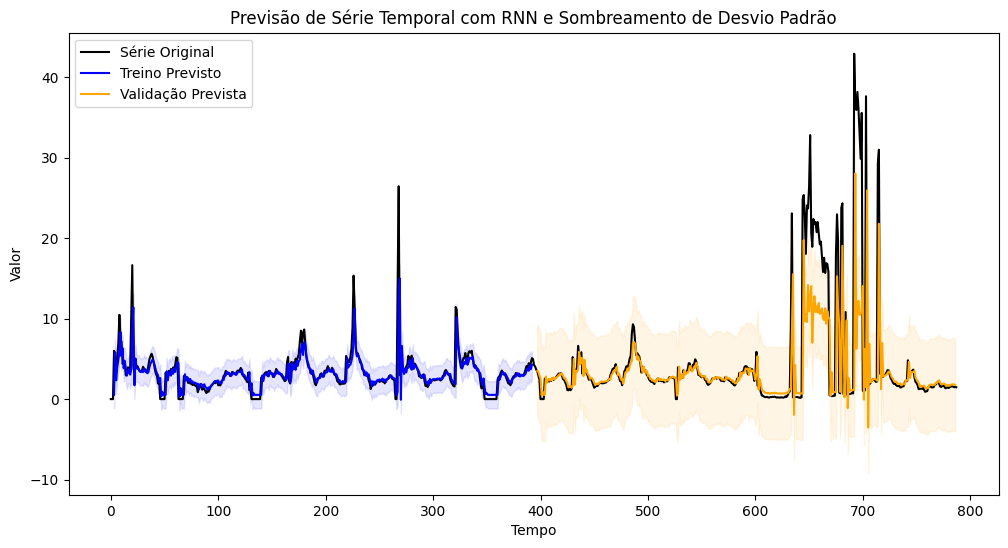

In [ ]:
# Continuando do código anterior...

# Calculando os erros
train_errors = train_predict[:, 0] - Y_train[0]
validation_errors = validation_predict[:, 0] - Y_validation[0]

# Calculando o desvio padrão dos erros
train_std = np.std(train_errors)
validation_std = np.std(validation_errors)

# Adicionando o sombreamento de desvio padrão aos gráficos
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(scaled_data), label='Série Original', color='k')

# Linhas de previsão
plt.plot(train_predict_plot, label='Treino Previsto', color='blue')
plt.plot(validation_predict_plot, label='Validação Prevista', color='orange')

# Sombreamento do desvio padrão para treino
plt.fill_between(np.arange(len(train_predict_plot)),
                 (train_predict_plot - train_std).flatten(),
                 (train_predict_plot + train_std).flatten(),
                 color='blue', alpha=0.1)

# Sombreamento do desvio padrão para validação
plt.fill_between(np.arange(len(validation_predict_plot)),
                 (validation_predict_plot - validation_std).flatten(),
                 (validation_predict_plot + validation_std).flatten(),
                 color='orange', alpha=0.1)

plt.title('Previsão de Série Temporal com RNN e Sombreamento de Desvio Padrão')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()
